In [1]:
%reset
import plotly.offline as py
import plotly.graph_objs as graph_objs
import pandas as pd
import geopandas as gpd
import numpy as np

mapbox_access_token = "pk.eyJ1IjoiamFja3AiLCJhIjoidG6JvA"

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
df=pd.read_csv('gva_county_predicted.csv')

In [9]:
df['fips']=df['fips'].apply(lambda x: str(x).zfill(5))

In [10]:
df.head()

,county_name,fips,n_injured,n_killed,n_total,state,year
0,Autauga,01001,2.0,2.0,4.0,Alabama,2014
1,Autauga,01001,4.0,1.0,5.0,Alabama,2015
2,Autauga,01001,3.0,3.0,6.0,Alabama,2016
3,Autauga,01001,6.0,8.0,14.0,Alabama,2017
4,Autauga,01001,6.5,8.5,15.0,Alabama,2018


In [11]:
df.sort_values(by=['n_killed'],ascending=False)

,county_name,fips,n_injured,n_killed,n_total,state,year
9777,Harris,48201,2677.0,2420.0,5097.0,Texas,2014
9778,Harris,48201,1486.0,2142.0,3628.0,Texas,2015
2391,Cook,17031,10653.4,1805.7,12459.1,Illinois,2018
2389,Cook,17031,8969.0,1456.0,10425.0,Illinois,2016
2390,Cook,17031,6943.0,1237.0,8180.0,Illinois,2017
9781,Harris,48201,1272.5,1083.8,2356.3,Texas,2018
2387,Cook,17031,4559.0,1029.0,5588.0,Illinois,2014
2388,Cook,17031,5956.0,985.0,6941.0,Illinois,2015
4568,Baltimore City,24510,2696.0,949.0,3645.0,Maryland,2015
8598,Philadelphia,42101,2662.0,869.0,3531.0,Pennsylvania,2014


In [12]:
df2 = pd.read_csv('Drug_Poisoning_Mortality_by_County.csv')

In [13]:
df2.head()

,FIPS,Year,State,ST,FIPS State,County,Population,"Estimated Age-adjusted Death Rate, 16 Categories (in ranges)"
0,1001,2015,Alabama,AL,1,"Autauga County, AL",55347.0,10.1-12
1,1001,2002,Alabama,AL,1,"Autauga County, AL",45909.0,4.1-6
2,1001,1999,Alabama,AL,1,"Autauga County, AL",42963.0,2.1-4
3,1001,2007,Alabama,AL,1,"Autauga County, AL",52405.0,6.1-8
4,1001,2010,Alabama,AL,1,"Autauga County, AL",54660.0,8.1-10


In [26]:
df_population = df2[df2.Year ==2015][['FIPS','Population']].drop_duplicates()

In [29]:
df_population.FIPS = df_population.FIPS.apply(lambda x: str(x).zfill(5))

In [32]:
df = df.merge(df_population, how='left', left_on='fips', right_on='FIPS')

In [36]:
df.n_killed = df.n_killed *10000 / df.Population
df.n_injured = df.n_injured *10000 / df.Population
df.n_total = df.n_total * 10000 / df.Population

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
## create bins to classify gun violance count per 10k population

In [110]:
bins ={}
for i in range(0,5):
    key = str(10*i)+'-'+str(10*(i+1))
    bins[key]=tuple([10*i,10*(i+1)])

In [111]:
bins['>50'] = tuple([50,500])

In [112]:
def assign_bins(number):
    key =[k for k,v in bins.items() if (number >=v[0] and number <=v[1])]
    return key[0]

In [113]:
df.n_injured = df.n_injured.apply(lambda x: assign_bins(x))
df.n_total = df.n_total.apply(lambda x: assign_bins(x))
df.n_killed = df.n_killed.apply(lambda x: assign_bins(x))

In [114]:
df.n_total.value_counts()

0-10     11423
10-20      156
20-30       35
>50         13
30-40       11
40-50        3
Name: n_total, dtype: int64

In [115]:
bins

{'0-10': (0, 10),
 '10-20': (10, 20),
 '20-30': (20, 30),
 '30-40': (30, 40),
 '40-50': (40, 50),
 '>50': (50, 500)}

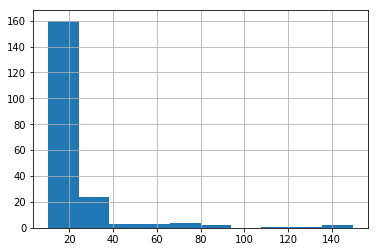

In [46]:
df.sort_values(by='n_total', ascending=False).n_total[:200].hist()

In [120]:
years = df.year.unique()

In [143]:
dfg = gpd.read_file('us-counties.json')
dfg['id'] = dfg['id'].apply(lambda x: x.zfill(5))

In [132]:
dfg.to_file("test.geojson", driver='GeoJSON')

In [144]:
df_single_year = df[df.year==2015]

In [151]:
tmp_df = dfg.merge(df_single_year, how='left', right_on='FIPS', left_on='id' )

In [155]:
dfg.to_file("test.geojson", driver='GeoJSON')

In [158]:
mkdir tmp

In [159]:
dfg.to_csv('tmp/tmp.csv')

In [163]:
bins.keys()

dict_keys(['0-10', '10-20', '20-30', '30-40', '40-50', '>50'])

In [177]:
df.columns

Index(['county_name', 'fips', 'n_injured', 'n_killed', 'n_total', 'state',
       'year', 'FIPS', 'Population'],
      dtype='object')

In [185]:
merged.drop(labels=['FIPS', 'Population'], inplace=True)

ValueError: labels ['FIPS' 'Population'] not contained in axis

In [178]:
geo_layer.columns

Index(['id', 'name', 'geometry', 'county_name', 'fips', 'n_injured',
       'n_killed', 'n_total', 'state', 'year', 'FIPS', 'Population'],
      dtype='object')

In [190]:
bins.keys()

dict_keys(['0-10', '10-20', '20-30', '30-40', '40-50', '>50'])

In [189]:
import os
for yr in years:
    df_single_year = df[(df.year == yr)]
    merged = dfg.merge(df_single_year, right_on='FIPS', left_on='id' )
    merged.drop(labels=['FIPS', 'Population'], axis=1,inplace=True)
    for key in bins.keys():
        print(yr,key)
        geo_layer = merged[merged.n_total == key] # geo
        #geo_layer.to_file('fullname.geojson', driver='GeoJSON')
        print(geo_layer.shape)
        #print(geo_layer)
        try:
            outname = str(key)+'.geojson'
            outdir = str(yr)
            if not os.path.exists(outdir):
                print(outdir, " created")
                os.mkdir(outdir)
            fullname = os.path.join('./',outdir, outname)    
            #print('fullname',fullname)
            geo_layer.to_file(fullname, driver='GeoJSON')
        except Exception as e: print(e)
            #traceback.print_exc()
            #print('err')

2014 0-10
(2053, 10)
2014  created
2014 10-20
(29, 10)
2014 20-30
(6, 10)
2014 30-40
(1, 10)
2014 40-50
(0, 10)
Geometry column cannot contain mutiple geometry types when writing to file.
2014 >50
(2, 10)
2015 0-10
(2113, 10)
2015  created
2015 10-20
(25, 10)
2015 20-30
(5, 10)
2015 30-40
(2, 10)
2015 40-50
(1, 10)
2015 >50
(2, 10)
2016 0-10
(2095, 10)
2016  created
2016 10-20
(20, 10)
2016 20-30
(8, 10)
2016 30-40
(3, 10)
2016 40-50
(0, 10)
Geometry column cannot contain mutiple geometry types when writing to file.
2016 >50
(3, 10)
2017 0-10
(2183, 10)
2017  created
2017 10-20
(30, 10)
2017 20-30
(4, 10)
2017 30-40
(2, 10)
2017 40-50
(1, 10)
2017 >50
(2, 10)
2018 0-10
(2763, 10)
2018  created
2018 10-20
(51, 10)
2018 20-30
(12, 10)
2018 30-40
(3, 10)
2018 40-50
(1, 10)
2018 >50
(4, 10)
2013 0-10
(152, 10)
2013  created
2013 10-20
(0, 10)
Geometry column cannot contain mutiple geometry types when writing to file.
2013 20-30
(0, 10)
Geometry column cannot contain mutiple geometry types 

In [119]:
df.head()

,county_name,fips,n_injured,n_killed,n_total,state,year,FIPS,Population
0,Autauga,01001,0-10,0-10,0-10,Alabama,2014,01001,55347.0
1,Autauga,01001,0-10,0-10,0-10,Alabama,2015,01001,55347.0
2,Autauga,01001,0-10,0-10,0-10,Alabama,2016,01001,55347.0
3,Autauga,01001,0-10,0-10,0-10,Alabama,2017,01001,55347.0
4,Autauga,01001,0-10,0-10,0-10,Alabama,2018,01001,55347.0


In [69]:
dfg

,id,name,geometry
0,01001,Autauga,"POLYGON ((-86.41178600000001 32.706342, -86.41..."
1,01003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2..."
2,01005,Barbour,"POLYGON ((-85.354736 32.147694, -85.053504 32...."
3,01007,Bibb,"POLYGON ((-87.063542 33.248559, -87.025203 33...."
4,01009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34...."
5,01011,Bullock,"POLYGON ((-85.91886100000001 32.273663, -85.43..."
6,01013,Butler,"POLYGON ((-86.477509 31.966955, -86.450124 31...."
7,01015,Calhoun,"POLYGON ((-85.738122 33.966038, -85.5299980000..."
8,01017,Chambers,"POLYGON ((-85.40402899999999 33.106158, -85.23..."
9,01019,Cherokee,"POLYGON ((-85.51356699999999 34.524686, -85.46..."


In [44]:
plt.show()

NameError: name 'plt' is not defined

In [4]:
dfg = gpd.read_file('us-counties.json')

In [44]:
plt.show()

NameError: name 'plt' is not defined

In [6]:
dfg['id'] = dfg['id'].apply(lambda x: x.zfill(5))

In [7]:
dfg.head()

,id,name,geometry
0,01001,Autauga,"POLYGON ((-86.41178600000001 32.706342, -86.41..."
1,01003,Baldwin,"POLYGON ((-87.76459 31.298768, -87.616713 31.2..."
2,01005,Barbour,"POLYGON ((-85.354736 32.147694, -85.053504 32...."
3,01007,Bibb,"POLYGON ((-87.063542 33.248559, -87.025203 33...."
4,01009,Blount,"POLYGON ((-86.488463 34.261793, -86.455601 34...."


In [192]:
df_lan_lon = pd.read_csv('lat_lon_counties.csv')

In [194]:
df_lan_lon.columns

Index(['Unnamed: 0', 'Sort ', 'State', 'FIPS ', 'County ', 'CountySeat(s) ',
       'Population(2010)', 'LandAreakm2 ', 'LandAreami2 ', 'WaterAreakm2 ',
       'WaterAreami2 ', 'TotalAreakm2 ', 'TotalAreami2 ', 'Latitude ',
       'Longitude'],
      dtype='object')

In [191]:
ls

2013/                                   GeoJSON factory.ipynb
2014/                                   gva_county_predicted.csv
2015/                                   gva_geojson_factory.ipynb
2016/                                   lat_lon_counties.csv
2017/                                   test.geojson
2018/                                   tmp/
Compressed_Mortality_1999_2016.txt      tmp.csv
county-level-choropleths-python.html    us-counties.json
Drug_Poisoning_Mortality_by_County.csv  us_county_lat_lon.txt
fullname.geojson
